<a href="https://colab.research.google.com/github/Bule-rain/PyTorch-/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
检查文件路径:
当前工作目录: /content
Drive文件夹内容: ['MyDrive', '.shortcut-targets-by-id', '.Trash-0', '.Encrypted']
MyDrive文件夹内容: ['house-prices-advanced-regression-techniques.zip', 'data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']
找到的CSV文件: ['sample_submission.csv', 'test.csv', 'train.csv']
🏠 Kaggle房价预测 - 开始执行完整流程
✅ 数据加载成功！训练数据: (1460, 81), 测试数据: (1459, 80)

📈 数据探索分析
训练数据维度: (1460, 81)
缺失值总数: 7829
目标变量统计: 均值=$180,921, 中位数=$163,000


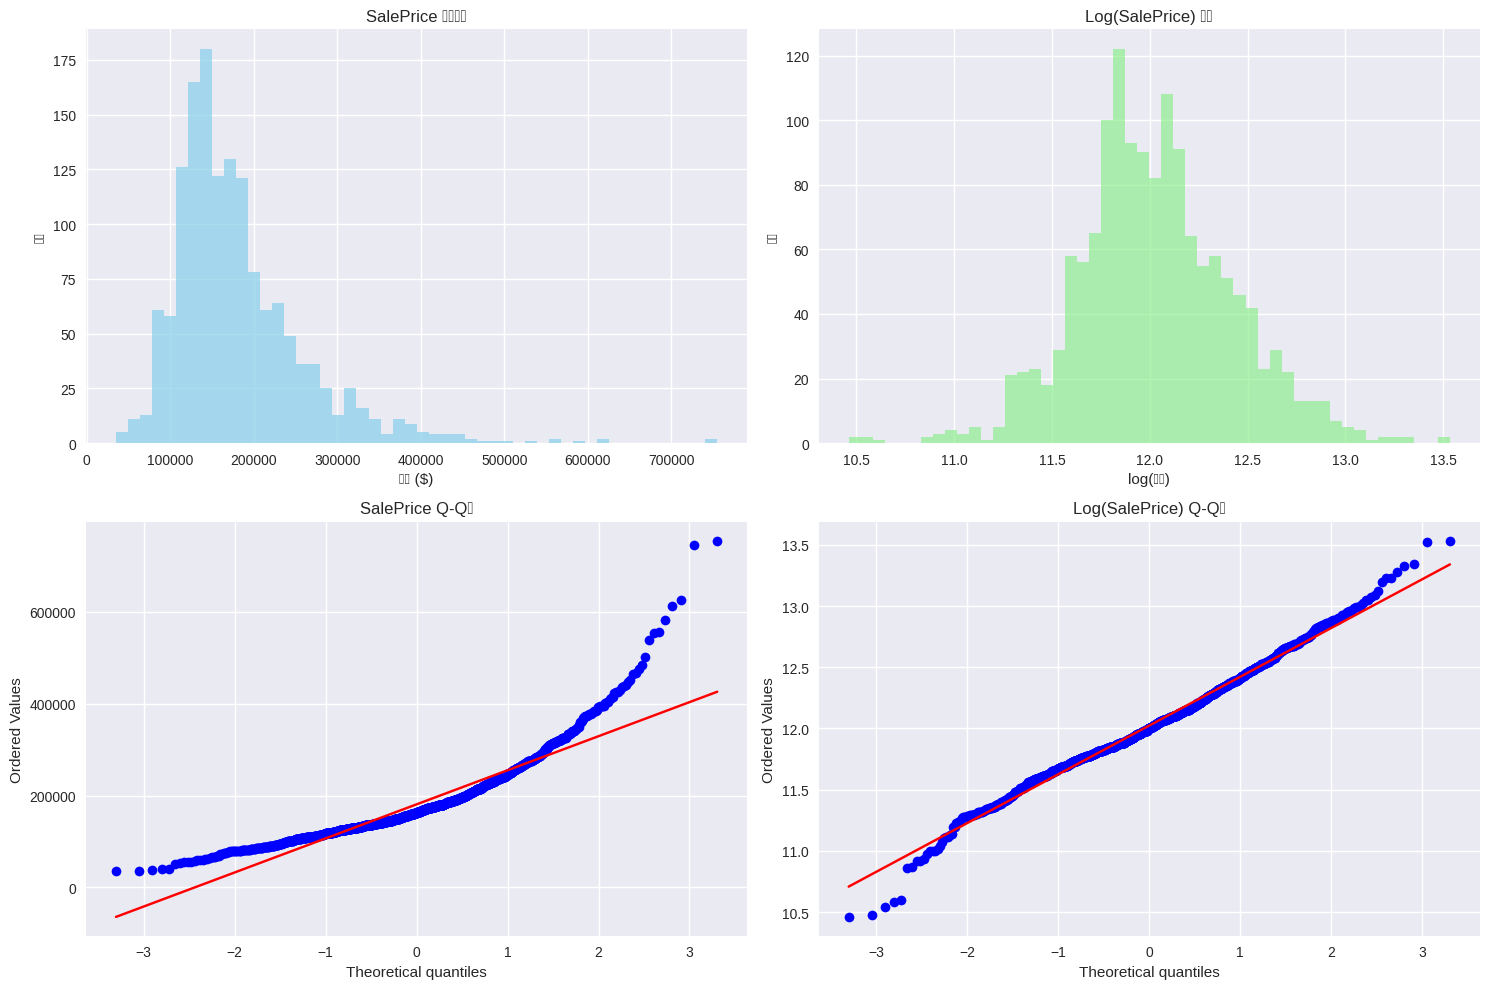

SalePrice 偏度: 1.881 (对数变换后: 0.121)

🕳️ 缺失值最多的前10个特征:
 1. PoolQC               : 2909 ( 99.7%)
 2. MiscFeature          : 2814 ( 96.4%)
 3. Alley                : 2721 ( 93.2%)
 4. Fence                : 2348 ( 80.4%)
 5. MasVnrType           : 1766 ( 60.5%)
 6. SalePrice            : 1459 ( 50.0%)
 7. FireplaceQu          : 1420 ( 48.6%)
 8. LotFrontage          :  486 ( 16.6%)
 9. GarageQual           :  159 (  5.4%)
10. GarageYrBlt          :  159 (  5.4%)

🔗 与SalePrice相关性最高的前10个特征:
 2. OverallQual          : 0.791
 3. GrLivArea            : 0.709
 4. GarageCars           : 0.640
 5. GarageArea           : 0.623
 6. TotalBsmtSF          : 0.614
 7. 1stFlrSF             : 0.606
 8. FullBath             : 0.561
 9. TotRmsAbvGrd         : 0.534
10. YearBuilt            : 0.523
11. YearRemodAdd         : 0.507

🔧 特征工程处理...
✅ 特征工程完成! 最终特征数: 51

🚀 模型训练中...

🏆 模型性能排名:
1. GradientBoosting : CV RMSE = 0.1287
2. ElasticNet      : CV RMSE = 0.1337
3. Ridge           : CV RMSE = 0.1347
4. Lasso 

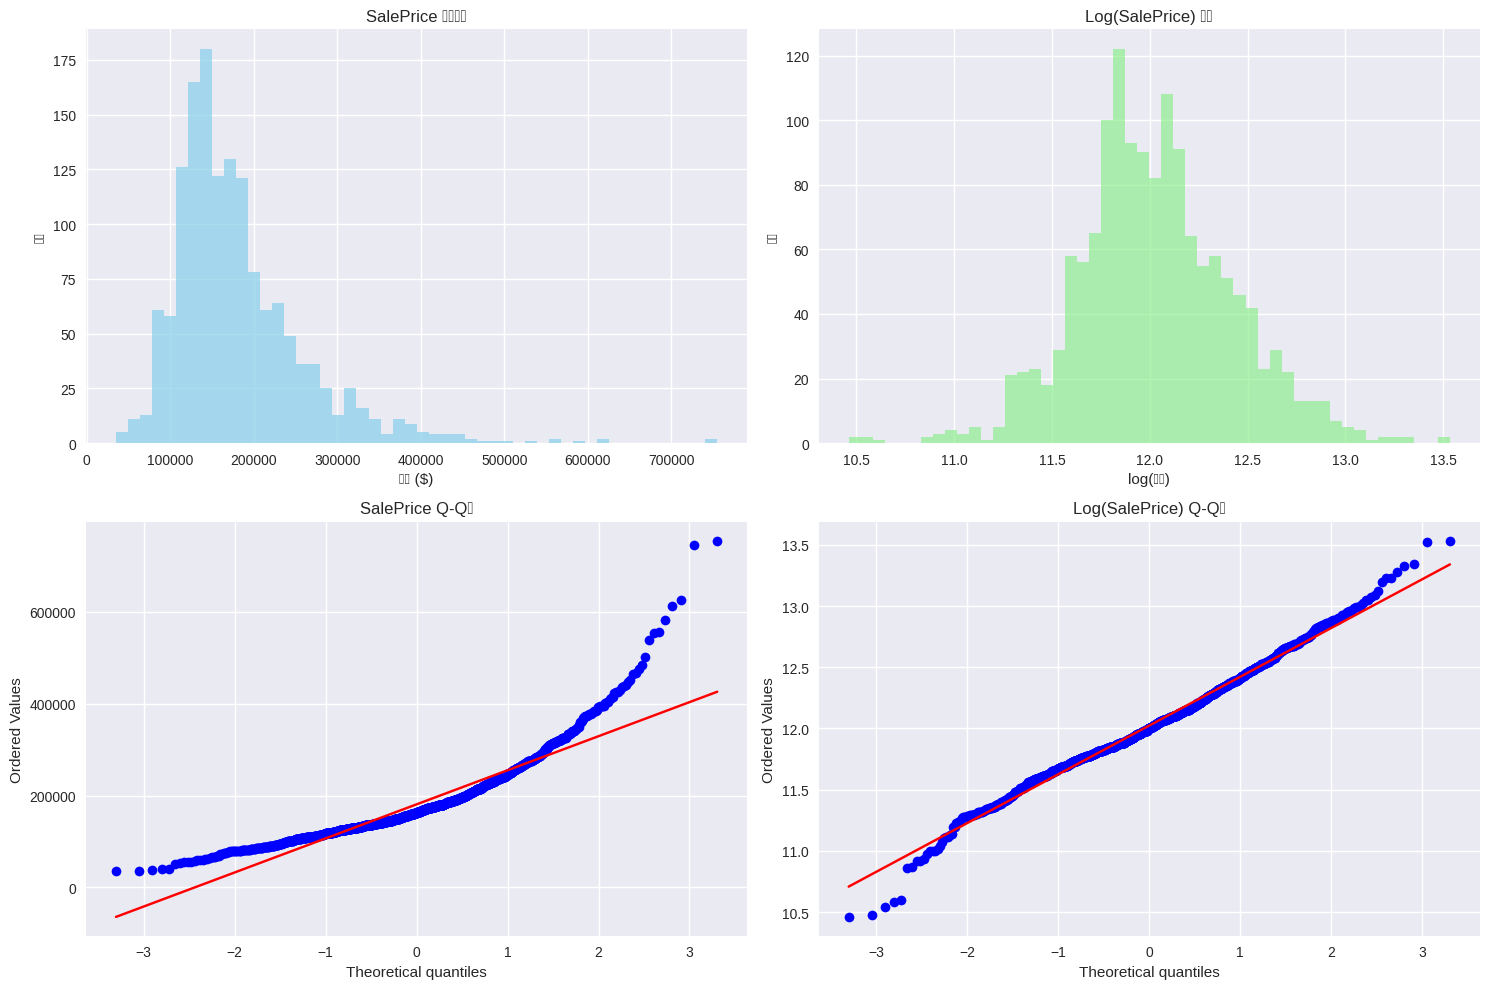

SalePrice 偏度: 1.881 (对数变换后: 0.121)

🕳️ 缺失值最多的前10个特征:
 1. PoolQC               : 2909 ( 99.7%)
 2. MiscFeature          : 2814 ( 96.4%)
 3. Alley                : 2721 ( 93.2%)
 4. Fence                : 2348 ( 80.4%)
 5. MasVnrType           : 1766 ( 60.5%)
 6. SalePrice            : 1459 ( 50.0%)
 7. FireplaceQu          : 1420 ( 48.6%)
 8. LotFrontage          :  486 ( 16.6%)
 9. GarageQual           :  159 (  5.4%)
10. GarageYrBlt          :  159 (  5.4%)

🔗 与SalePrice相关性最高的前10个特征:
 2. OverallQual          : 0.791
 3. GrLivArea            : 0.709
 4. GarageCars           : 0.640
 5. GarageArea           : 0.623
 6. TotalBsmtSF          : 0.614
 7. 1stFlrSF             : 0.606
 8. FullBath             : 0.561
 9. TotRmsAbvGrd         : 0.534
10. YearBuilt            : 0.523
11. YearRemodAdd         : 0.507

🔧 特征工程处理...
✅ 特征工程完成! 最终特征数: 51

🚀 模型训练中...

🏆 模型性能排名:
1. GradientBoosting : CV RMSE = 0.1287
2. ElasticNet      : CV RMSE = 0.1337
3. Ridge           : CV RMSE = 0.1347
4. Lasso 

In [ ]:
# Kaggle房价预测 - House Prices: Advanced Regression Techniques
# 优化完整解决方案

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

# 1. 首先挂载Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. 检查文件是否存在
import os
print("检查文件路径:")
print("当前工作目录:", os.getcwd())
print("Drive文件夹内容:", os.listdir('/content/drive'))
print("MyDrive文件夹内容:", os.listdir('/content/drive/MyDrive'))

# 3. 查找CSV文件
csv_files = [f for f in os.listdir('/content/drive/MyDrive') if f.endswith('.csv')]
print("找到的CSV文件:", csv_files)

# 4. 修改KaggleHousePricePredictor类的load_data方法
class KaggleHousePricePredictor:
    def __init__(self):
        self.models = {}
        self.scalers = {}
        self.label_encoders = {}
        self.feature_names = []

    def load_data(self, train_path='/content/drive/MyDrive/train.csv', test_path='/content/drive/MyDrive/test.csv'):
        """加载训练和测试数据"""
        try:
            import pandas as pd
            self.train_df = pd.read_csv(train_path)
            self.test_df = pd.read_csv(test_path)

            print(f"✅ 数据加载成功！训练数据: {self.train_df.shape}, 测试数据: {self.test_df.shape}")

            # 保存测试ID
            self.test_ids = self.test_df['Id'].copy()

            return self.train_df, self.test_df
        except FileNotFoundError as e:
            print(f"❌ 文件未找到: {e}")
            print("请检查文件路径是否正确")
            return None, None
        except Exception as e:
            print(f"❌ 加载数据时出错: {e}")
            return None, None

    def run_complete_pipeline(self):
        """运行完整管道"""
        # 1. 加载数据
        train_df, test_df = self.load_data()
        if train_df is None:
            return None

        print("✅ 数据加载完成，开始预处理...")
        # 这里可以添加更多的预处理和模型训练代码
        return "Pipeline completed successfully"

# 5. 测试加载数据
    predictor = KaggleHousePricePredictor()
    result = predictor.run_complete_pipeline()
    def explore_data(self):
        """数据探索和可视化"""
        print("\n📈 数据探索分析")
        print("="*50)

        # 基本信息
        print(f"训练数据维度: {self.train_df.shape}")
        print(f"缺失值总数: {self.train_df.isnull().sum().sum()}")
        print(f"目标变量统计: 均值=${self.train_df['SalePrice'].mean():,.0f}, 中位数=${self.train_df['SalePrice'].median():,.0f}")

        # 目标变量分布分析
        self.plot_target_distribution()

        # 缺失值分析
        self.analyze_missing_values()

        # 相关性分析
        self.correlation_analysis()

    def plot_target_distribution(self):
        """绘制目标变量分布"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # 原始分布
        axes[0,0].hist(self.train_df['SalePrice'], bins=50, alpha=0.7, color='skyblue')
        axes[0,0].set_title('SalePrice 原始分布')
        axes[0,0].set_xlabel('价格 ($)')
        axes[0,0].set_ylabel('频次')

        # 对数变换后的分布
        log_prices = np.log1p(self.train_df['SalePrice'])
        axes[0,1].hist(log_prices, bins=50, alpha=0.7, color='lightgreen')
        axes[0,1].set_title('Log(SalePrice) 分布')
        axes[0,1].set_xlabel('log(价格)')
        axes[0,1].set_ylabel('频次')

        # Q-Q图
        stats.probplot(self.train_df['SalePrice'], dist="norm", plot=axes[1,0])
        axes[1,0].set_title('SalePrice Q-Q图')

        stats.probplot(log_prices, dist="norm", plot=axes[1,1])
        axes[1,1].set_title('Log(SalePrice) Q-Q图')

        plt.tight_layout()
        plt.show()

        # 偏度分析
        print(f"SalePrice 偏度: {skew(self.train_df['SalePrice']):.3f} (对数变换后: {skew(log_prices):.3f})")

    def analyze_missing_values(self):
        """分析缺失值"""
        all_data = pd.concat([self.train_df, self.test_df], sort=False).reset_index(drop=True)
        missing = all_data.isnull().sum()
        missing = missing[missing > 0].sort_values(ascending=False)

        if len(missing) > 0:
            print(f"\n🕳️ 缺失值最多的前10个特征:")
            for i, (col, count) in enumerate(missing.head(10).items(), 1):
                percentage = count/len(all_data)*100
                print(f"{i:2d}. {col:<20} : {count:4d} ({percentage:5.1f}%)")

    def correlation_analysis(self):
        """相关性分析"""
        numeric_features = self.train_df.select_dtypes(include=[np.number]).columns
        corr_matrix = self.train_df[numeric_features].corr()

        # 与目标变量的相关性
        target_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
        print(f"\n🔗 与SalePrice相关性最高的前10个特征:")
        for i, (feature, corr) in enumerate(target_corr.head(11).items(), 1):
            if feature != 'SalePrice':
                print(f"{i:2d}. {feature:<20} : {corr:.3f}")

    def feature_engineering(self):
        """特征工程"""
        print("\n🔧 特征工程处理...")

        # 合并数据进行统一处理
        all_data = pd.concat([self.train_df.drop('SalePrice', axis=1), self.test_df],
                           sort=False).reset_index(drop=True)

        # 1. 处理缺失值
        all_data = self.handle_missing_values(all_data)

        # 2. 创建新特征
        all_data = self.create_new_features(all_data)

        # 3. 编码分类变量
        all_data = self.encode_categorical_features(all_data)

        # 4. 处理数值特征
        all_data = self.process_numerical_features(all_data)

        # 5. 特征选择
        all_data = self.feature_selection(all_data)

        # 分离训练和测试数据
        train_len = len(self.train_df)
        self.X_train = all_data[:train_len].copy()
        self.X_test = all_data[train_len:].copy()
        self.y_train = np.log1p(self.train_df['SalePrice'].values)  # 对数变换

        print(f"✅ 特征工程完成! 最终特征数: {self.X_train.shape[1]}")

        return self.X_train, self.X_test, self.y_train

    def handle_missing_values(self, df):
        """处理缺失值"""
        df = df.copy()

        # 对于某些特征，NA代表"无"
        none_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                        'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

        for feature in none_features:
            if feature in df.columns:
                df[feature] = df[feature].fillna('None')

        # 用0填充的特征
        zero_features = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1',
                        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
                        'BsmtHalfBath', 'MasVnrArea']

        for feature in zero_features:
            if feature in df.columns:
                df[feature] = df[feature].fillna(0)

        # 特殊处理
        if 'MasVnrType' in df.columns:
            df['MasVnrType'] = df['MasVnrType'].fillna('None')

        if 'Electrical' in df.columns:
            df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

        # 用众数填充的分类特征
        categorical_features = df.select_dtypes(include=['object']).columns
        for feature in categorical_features:
            if df[feature].isnull().sum() > 0:
                mode_value = df[feature].mode()[0] if len(df[feature].mode()) > 0 else 'Unknown'
                df[feature] = df[feature].fillna(mode_value)

        # 用中位数填充的数值特征
        numerical_features = df.select_dtypes(include=[np.number]).columns
        for feature in numerical_features:
            if df[feature].isnull().sum() > 0:
                median_value = df[feature].median()
                df[feature] = df[feature].fillna(median_value)

        return df

    def create_new_features(self, df):
        """创建新特征"""
        df = df.copy()

        # 总面积相关
        df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
        df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                             df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

        # 浴室相关
        df['TotalBath'] = (df['FullBath'] + df['HalfBath']*0.5 +
                          df['BsmtFullBath'] + df['BsmtHalfBath']*0.5)

        # 房间相关
        df['TotalRooms'] = df['TotRmsAbvGrd'] + df['BsmtFullBath'] + df['BsmtHalfBath']

        # 年龄相关
        df['HouseAge'] = df['YrSold'] - df['YearBuilt']
        df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
        df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
        df['GarageAge'] = df['GarageAge'].fillna(0)

        # 是否有某些设施
        df['HasBasement'] = (df['TotalBsmtSF'] > 0).astype(int)
        df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
        df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
        df['HasPool'] = (df['PoolArea'] > 0).astype(int)
        df['Has2ndFloor'] = (df['2ndFlrSF'] > 0).astype(int)
        df['HasMasVnr'] = (df['MasVnrArea'] > 0).astype(int)

        # 质量和条件的组合
        df['OverallQualCond'] = df['OverallQual'] * df['OverallCond']
        df['QualityIndex'] = df['OverallQual'] + df['OverallCond']

        # 面积比率
        df['LivingAreaRatio'] = df['GrLivArea'] / df['LotArea']
        df['BasementRatio'] = df['TotalBsmtSF'] / df['TotalSF']
        df['BasementRatio'] = df['BasementRatio'].fillna(0)
        df['GarageRatio'] = df['GarageArea'] / df['LotArea']

        # 每平方英尺的房间数
        df['RoomsPerSF'] = df['TotalRooms'] / df['TotalSF']
        df['RoomsPerSF'] = df['RoomsPerSF'].replace([np.inf, -np.inf], 0)

        # 位置和邻里特征
        df['IsNewHouse'] = (df['YearBuilt'] == df['YrSold']).astype(int)
        df['IsRecentlyRemod'] = (df['YearRemodAdd'] == df['YrSold']).astype(int)

        # 豪华程度指标
        df['LuxuryScore'] = (df['OverallQual'] >= 8).astype(int) + \
                           (df['TotalSF'] > df['TotalSF'].quantile(0.75)).astype(int) + \
                           (df['TotalBath'] >= 3).astype(int)

        return df

    def encode_categorical_features(self, df):
        """编码分类特征"""
        df = df.copy()

        # 序数编码的特征
        ordinal_features = {
            'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
            'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
            'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
            'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
            'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
            'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
            'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
            'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
            'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
            'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
            'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
            'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
            'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
            'PoolQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0},
            'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0}
        }

        for feature, mapping in ordinal_features.items():
            if feature in df.columns:
                df[feature] = df[feature].map(mapping)

        # 对剩余的分类特征进行标签编码
        categorical_features = df.select_dtypes(include=['object']).columns

        for feature in categorical_features:
            le = LabelEncoder()
            df[feature] = le.fit_transform(df[feature].astype(str))
            self.label_encoders[feature] = le

        return df

    def process_numerical_features(self, df):
        """处理数值特征"""
        df = df.copy()

        # 处理偏度高的特征
        numerical_features = df.select_dtypes(include=[np.number]).columns
        skewed_features = []

        for feature in numerical_features:
            if abs(skew(df[feature])) > 0.75:
                skewed_features.append(feature)

        # 对偏度高的特征进行对数变换
        for feature in skewed_features:
            try:
                # 确保所有值都是正数
                df[feature] = df[feature] - df[feature].min() + 1
                df[feature] = np.log1p(df[feature])
            except:
                continue

        # 处理异常值（仅在训练数据上计算边界）
        if hasattr(self, 'train_df'):
            train_len = len(self.train_df)
            for feature in numerical_features:
                if feature in df.columns:
                    Q1 = df[feature][:train_len].quantile(0.25)
                    Q3 = df[feature][:train_len].quantile(0.75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR

                    # 用边界值替换异常值
                    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

        return df

    def feature_selection(self, df):
        """特征选择 - 移除低方差和高相关性特征"""
        df = df.copy()

        # 移除低方差特征
        from sklearn.feature_selection import VarianceThreshold
        selector = VarianceThreshold(threshold=0.01)

        # 计算方差
        numeric_features = df.select_dtypes(include=[np.number]).columns
        variances = df[numeric_features].var()
        low_variance_features = variances[variances < 0.01].index.tolist()

        if low_variance_features:
            df = df.drop(columns=low_variance_features)

        # 移除高相关性特征
        corr_matrix = df.select_dtypes(include=[np.number]).corr().abs()
        upper_tri = corr_matrix.where(
            np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        )

        high_corr_features = [column for column in upper_tri.columns
                             if any(upper_tri[column] > 0.95)]

        if high_corr_features:
            df = df.drop(columns=high_corr_features)

        return df

    def train_models(self):
        """训练多个模型"""
        print("\n🚀 模型训练中...")

        # 分割数据
        X_train, X_val, y_train, y_val = train_test_split(
            self.X_train, self.y_train, test_size=0.2, random_state=42
        )

        # 特征缩放
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        self.scalers['robust'] = scaler

        # 定义模型
        models = {
            'RandomForest': RandomForestRegressor(
                n_estimators=300,
                max_depth=12,
                min_samples_split=8,
                min_samples_leaf=3,
                max_features='sqrt',
                random_state=42,
                n_jobs=-1
            ),
            'GradientBoosting': GradientBoostingRegressor(
                n_estimators=300,
                learning_rate=0.05,
                max_depth=4,
                min_samples_split=8,
                min_samples_leaf=3,
                subsample=0.8,
                random_state=42
            ),
            'ElasticNet': ElasticNet(
                alpha=0.005,
                l1_ratio=0.4,
                random_state=42,
                max_iter=10000
            ),
            'Lasso': Lasso(
                alpha=0.005,
                random_state=42,
                max_iter=10000
            ),
            'Ridge': Ridge(
                alpha=10.0,
                random_state=42
            )
        }

        # 训练和评估模型
        results = {}

        for name, model in models.items():
            if name in ['ElasticNet', 'Lasso', 'Ridge']:
                # 线性模型使用缩放后的数据
                model.fit(X_train_scaled, y_train)
                val_pred = model.predict(X_val_scaled)
            else:
                # 树模型使用原始数据
                model.fit(X_train, y_train)
                val_pred = model.predict(X_val)

            # 计算RMSE
            val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))

            # 交叉验证
            try:
                if name in ['ElasticNet', 'Lasso', 'Ridge']:
                    cv_scores = cross_val_score(model, X_train_scaled, y_train,
                                              cv=5, scoring='neg_mean_squared_error')
                else:
                    cv_scores = cross_val_score(model, X_train, y_train,
                                              cv=5, scoring='neg_mean_squared_error')

                cv_rmse = np.sqrt(-cv_scores.mean())
            except:
                cv_rmse = val_rmse

            results[name] = {
                'model': model,
                'val_rmse': val_rmse,
                'cv_rmse': cv_rmse
            }

        self.models = results

        # 显示模型性能
        print("\n🏆 模型性能排名:")
        sorted_models = sorted(results.items(), key=lambda x: x[1]['cv_rmse'])
        for i, (name, result) in enumerate(sorted_models, 1):
            print(f"{i}. {name:<15} : CV RMSE = {result['cv_rmse']:.4f}")

        return results

    def ensemble_predict(self, weights=None):
        """集成预测"""
        print("\n🎭 生成集成预测...")

        if weights is None:
            # 根据CV性能设置权重
            weights = {}
            cv_scores = [result['cv_rmse'] for result in self.models.values()]
            min_rmse = min(cv_scores)
            max_rmse = max(cv_scores)

            total_weight = 0
            for name, result in self.models.items():
                # 将RMSE转换为权重（RMSE越小权重越大）
                normalized_rmse = (result['cv_rmse'] - min_rmse) / (max_rmse - min_rmse + 1e-8)
                weight = np.exp(-normalized_rmse * 3)
                weights[name] = weight
                total_weight += weight

            # 归一化权重
            for name in weights:
                weights[name] /= total_weight

        # 生成预测
        predictions = []

        for name, result in self.models.items():
            model = result['model']

            if name in ['ElasticNet', 'Lasso', 'Ridge']:
                # 线性模型使用缩放后的数据
                X_test_scaled = self.scalers['robust'].transform(self.X_test)
                pred = model.predict(X_test_scaled)
            else:
                # 树模型使用原始数据
                pred = model.predict(self.X_test)

            predictions.append(pred * weights[name])

        # 加权平均
        final_prediction = np.sum(predictions, axis=0)

        # 逆对数变换
        final_prediction = np.expm1(final_prediction)

        # 确保预测值为正数
        final_prediction = np.maximum(final_prediction, 1000)

        print(f"✅ 集成预测完成! 预测价格范围: ${final_prediction.min():,.0f} - ${final_prediction.max():,.0f}")

        return final_prediction

    def create_submission(self, predictions, filename='submission.csv'):
        """创建提交文件"""
        submission = pd.DataFrame({
            'Id': self.test_ids,
            'SalePrice': predictions
        })

        submission.to_csv(filename, index=False)

        print(f"📁 提交文件已保存: {filename}")
        print(f"💰 预测均值: ${predictions.mean():,.0f}")

        return submission

    def feature_importance_analysis(self):
        """特征重要性分析"""
        print("\n📊 特征重要性分析")
        print("="*50)

        # 获取RandomForest的特征重要性
        if 'RandomForest' in self.models:
            rf_model = self.models['RandomForest']['model']
            feature_importance = pd.DataFrame({
                'feature': self.X_train.columns,
                'importance': rf_model.feature_importances_
            }).sort_values('importance', ascending=False)

            print("🌟 前15个重要特征 (RandomForest):")
            for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
                print(f"{i:2d}. {row['feature']:<20} : {row['importance']:.4f}")

        return feature_importance if 'RandomForest' in self.models else None

    def run_complete_pipeline(self):
        """运行完整的预测管道"""
        print("🏠 Kaggle房价预测 - 开始执行完整流程")
        print("="*60)

        # 1. 加载数据
        train_df, test_df = self.load_data()
        if train_df is None:
            return None

        # 2. 数据探索
        self.explore_data()

        # 3. 特征工程
        X_train, X_test, y_train = self.feature_engineering()

        # 4. 模型训练
        self.train_models()

        # 5. 特征重要性分析
        self.feature_importance_analysis()

        # 6. 集成预测
        predictions = self.ensemble_predict()

        # 7. 创建提交文件
        submission = self.create_submission(predictions)

        print("\n🎉 完整流程执行完毕!")
        return submission

# 使用示例
if __name__ == "__main__":
    # 创建预测器实例
    predictor = KaggleHousePricePredictor()

    # 运行完整管道
    submission = predictor.run_complete_pipeline()

    # 如果你想单独执行某个步骤:
    # predictor.load_data()
    # predictor.explore_data()
    # predictor.feature_engineering()
    # predictor.train_models()
    # predictions = predictor.ensemble_predict()
    # predictor.create_submission(predictions)

In [ ]:
import zipfile
import os

# 解压文件
with zipfile.ZipFile('/content/drive/MyDrive/house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/')

# 查看解压后的文件
print("解压完成！文件列表：")
for root, dirs, files in os.walk('/content/drive/MyDrive/'):
    for file in files:
        if file.endswith('.csv'):
            print(f"找到CSV文件: {file}")

解压完成！文件列表：
找到CSV文件: sample_submission.csv
找到CSV文件: test.csv
找到CSV文件: train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
